# Cartopy tutorial: Transforming raster to raster

[Introduction](../../introduction.ipynb) > [Geospatial data](../geospatial_data.ipynb) > Raster to raster

## The 1870s decadal mean surface temperature dataset

For the sake of brevity, the data required for this section is available in ``../../resources/HadCRUT/fogg_mean_surface_temp.nc`` and was pre-processed by the following [notebook](../../resources/HadCRUT/create_fogg_mean_surface_temp.ipynb).

The data comes from [HadCRUT](https://en.wikipedia.org/wiki/HadCRUT) and is representative of decadal mean surface temperatures during the period of Foggs epic journey around the world in 1872.

So, let's first take a peek inside the NetCDF file that contains the pre-processed 1870's decadal mean surface temperatures for the three representative months of Phileas Foggs journey during **October, November** and **December**...

In [5]:
fname = '../../resources/HadCRUT/fogg_mean_surface_temp.nc'

In [3]:
import importlib
import sys

def version(pkg):
    try:
        mod = importlib.import_module(pkg)
        print(OK, '%s version %s' % (pkg, mod.__version__))
    except ImportError:
        print(FAIL, '%s not installed' % pkg)
        
try:
    import curses
    curses.setupterm()
    assert curses.tigetnum("colors") > 2
    OK = "\x1b[1;%dm[ OK ]\x1b[0m" % (30 + curses.COLOR_GREEN)
    FAIL = "\x1b[1;%dm[FAIL]\x1b[0m" % (30 + curses.COLOR_RED)
except:
    OK = '[ OK ]'
    FAIL = '[FAIL]'

In [4]:
version('iris')

[ OK ] iris version 2.1.0


In [6]:
!ncdump -h $fname

netcdf ../../resources/HadCRUT/fogg_mean_surface_temp {
dimensions:
	time = 3 ;
	latitude = 36 ;
	longitude = 72 ;
	bnds = 2 ;
variables:
	double mean_surface_temperature(time, latitude, longitude) ;
		mean_surface_temperature:_FillValue = 1.e+20 ;
		mean_surface_temperature:long_name = "Mean Surface Temperature" ;
		mean_surface_temperature:units = "K" ;
		mean_surface_temperature:cell_methods = "decade: month_number: mean" ;
		mean_surface_temperature:coordinates = "decade month_number" ;
	float time(time) ;
		time:axis = "T" ;
		time:bounds = "time_bnds" ;
		time:units = "days since 1850-1-1 00:00:00" ;
		time:standard_name = "time" ;
		time:long_name = "time" ;
		time:calendar = "gregorian" ;
	float time_bnds(time, bnds) ;
	float latitude(latitude) ;
		latitude:axis = "Y" ;
		latitude:units = "degrees_north" ;
		latitude:standard_name = "latitude" ;
		latitude:long_name = "latitude" ;
		latitude:point_spacing = "even" ;
	float longitude(longitude) ;
		longitude:axis = "X" ;
		longi

There are a wide variety of open source tools at our disposal to read and extract this data from our netCDF file. However, we've chosen to do this with [iris](https://github.com/SciTools/iris) as it's ideal for performing the task of loading, analyzing and plotting such data. 

Other approaches, including NetCDF4-python and XArray can be seen in the tutorial's [appendix](../../appendix/raster_to_raster/netcdf_and_xarray.ipynb).

## Using iris and cartopy

Iris implements a data model based on the [CF conventions](http://cfconventions.org/)
giving you a powerful, format-agnostic interface for working with your data.
It excels when working with multi-dimensional Earth Science data, where tabular
representations become unwieldy and inefficient.

Building upon [NumPy](http://www.numpy.org/) and [dask](https://dask.pydata.org/en/latest/),
Iris scales from efficient single-machine workflows right through to multi-core clusters and HPC.
Interoperability with packages from the wider scientific Python ecosystem comes from Iris'
use of standard NumPy/dask arrays as its underlying data storage.

Now let's load our decadal mean surface temperature data for **October** using `iris`, and generate some raster block and countour plots...

In [7]:
import iris

cube = iris.load_cube(fname)

C:\Users\burtg\AppData\Local\Continuum\anaconda3\envs\scipy-cartopy-tutorial\lib\site-packages\iris\fileformats\_pyke_rules\compiled_krb\fc_rules_cf_fc.py:2029: UserWarning: Gracefully filling 'latitude' dimension coordinate masked points
  warnings.warn(msg.format(str(cf_coord_var.cf_name)))
C:\Users\burtg\AppData\Local\Continuum\anaconda3\envs\scipy-cartopy-tutorial\lib\site-packages\iris\fileformats\_pyke_rules\compiled_krb\fc_rules_cf_fc.py:2029: UserWarning: Gracefully filling 'longitude' dimension coordinate masked points
  warnings.warn(msg.format(str(cf_coord_var.cf_name)))
C:\Users\burtg\AppData\Local\Continuum\anaconda3\envs\scipy-cartopy-tutorial\lib\site-packages\iris\fileformats\_pyke_rules\compiled_krb\fc_rules_cf_fc.py:2029: UserWarning: Gracefully filling 'time' dimension coordinate masked points
  warnings.warn(msg.format(str(cf_coord_var.cf_name)))
C:\Users\burtg\AppData\Local\Continuum\anaconda3\envs\scipy-cartopy-tutorial\lib\site-packages\iris\fileformats\_pyke_rul

In [4]:
iris?

In [8]:
cube

<iris 'Cube' of Mean Surface Temperature / (K) (time: 3; latitude: 36; longitude: 72)>

First, let's take a quick peek at some of the cube metadata, just to make sure that all is as expected... 

In [9]:
print(cube.coord('decade').points)

[1870 1870 1870]


In [10]:
print(cube.coord('month_number').points)

[10 11 12]


In [11]:
print(cube.coord('time'))

DimCoord([1875-04-17 00:00:00, 1875-05-17 12:00:00, 1875-06-17 00:00:00], bounds=[[1870-10-16 12:00:00, 1879-10-16 12:00:00],
       [1870-11-16 00:00:00, 1879-11-16 00:00:00],
       [1870-12-16 12:00:00, 1879-12-16 12:00:00]], standard_name='time', calendar='gregorian', long_name='time', var_name='time')


Okay, all seem's to be as we expected. So now let's cherry-pick out the data that we require in order to visualize the decadal mean surface temperature for **October** 1870s using a **Robinson** projection...

In [12]:
%matplotlib notebook

import cartopy.crs as ccrs
import iris.plot as iplt
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


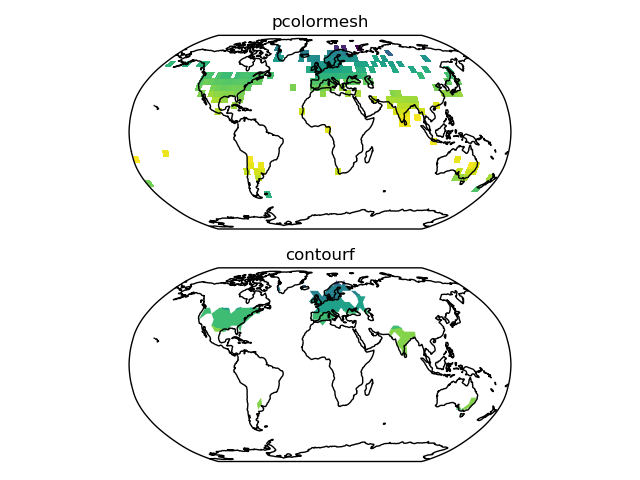

C:\Users\burtg\AppData\Local\Continuum\anaconda3\envs\scipy-cartopy-tutorial\lib\site-packages\iris\coords.py:1000: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
C:\Users\burtg\AppData\Local\Continuum\anaconda3\envs\scipy-cartopy-tutorial\lib\site-packages\iris\coords.py:1000: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))


In [13]:
plt.figure()

october_cube = cube.extract(iris.Constraint(month_number=10))

ax1 = plt.subplot(211, projection=ccrs.Robinson())
iplt.pcolormesh(october_cube)
plt.title('pcolormesh')
ax1.coastlines()
ax1.set_global()

ax2 = plt.subplot(212, projection=ccrs.Robinson())
iplt.contourf(october_cube)
plt.title('contourf')
ax2.coastlines()
ax2.set_global()

plt.tight_layout()
plt.show()

## Reprojecting raster images

As we have previously seen, we can leverage the power of `cartopy` to plot raster images.

Recall the exercise to plot the geolocated [Wikipedia image](https://commons.wikimedia.org/wiki/File:Around_the_World_in_Eighty_Days_map.png) of Foggs proposed route in its native `Robinson` projection...

<IPython.core.display.Javascript object>


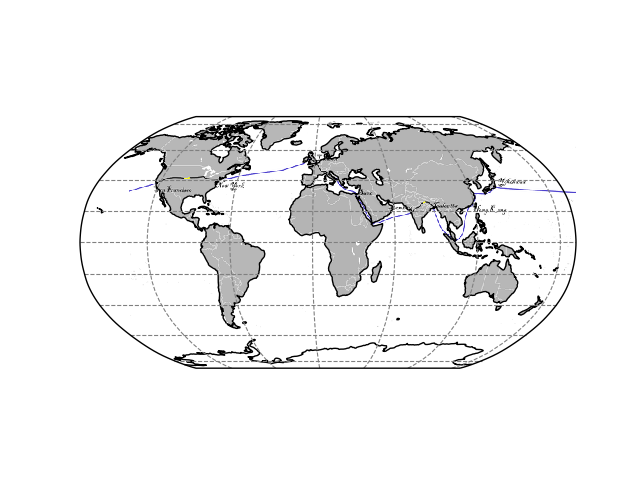

<IPython.core.display.Javascript object>


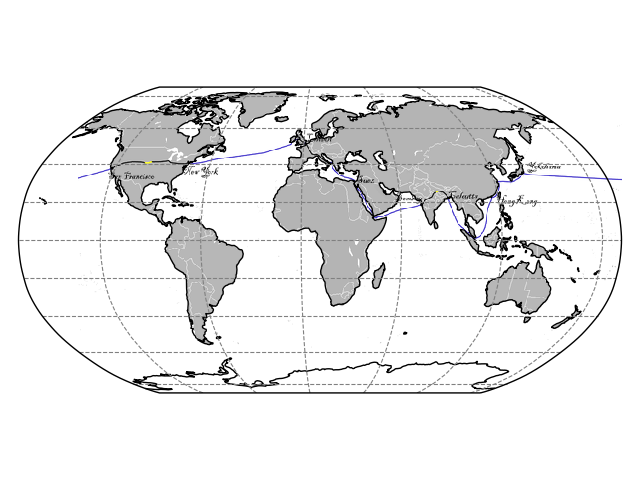

In [14]:
# Our calculated geolocated raster image extents.
extent = [-13636707, 17044670,
          -6308712, 8565930]

plt.figure()

rob = ccrs.Robinson(central_longitude=11.25)
ax = plt.axes(projection=rob)

ax.gridlines(color='gray', linestyle='--')
ax.coastlines()
img = plt.imread('../../resources/640px-Around_the_World_in_Eighty_Days_map.png')
ax.imshow(img, extent=extent, transform=rob, origin='upper')
ax.set_global()

plt.figure()

fname = '../../resources/640px-Around_the_World_in_Eighty_Days_map.png'

rob = ccrs.Robinson(central_longitude=11.25)
ax = plt.axes(projection=rob)

ax.gridlines(color='gray', linestyle='--')
ax.coastlines()
img = plt.imread(fname)
ax.imshow(img, extent=extent, transform=rob, origin='upper')
ax.set_global()

plt.tight_layout()
plt.show()

We can use `cartopy` to reproject raster images to a different (non-native) target projection.

So let's do that, by reprojecting our [Wikipedia image](https://commons.wikimedia.org/wiki/File:Around_the_World_in_Eighty_Days_map.png) from `Robinson` to `Plate Carree` projection...

<IPython.core.display.Javascript object>


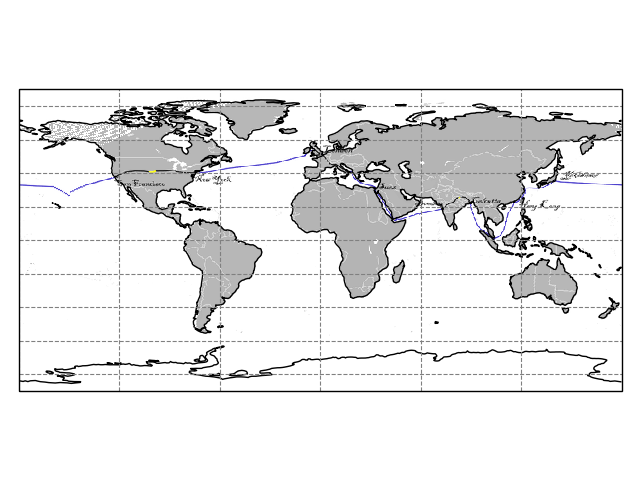

In [15]:
plt.figure()

ax = plt.axes(projection=ccrs.PlateCarree())
ax.gridlines(color='gray', linestyle='--')
ax.coastlines()

img = plt.imread(fname)
ax.imshow(img, extent=extent, transform=rob, origin='upper')
ax.set_global()

plt.tight_layout()
plt.show()

For faster and higher fidelity image reprojections [rasterio](https://github.com/mapbox/rasterio) would be a great choice, but cartopy's general (spherical) implementation is a good fall-back option.   

**Exercise 3.1:** Use `iris` to plot the decadal mean surface temperatures for **October** 1870s, using either a block or contour plot, over the above [Wikipedia image](https://commons.wikimedia.org/wiki/File:Around_the_World_in_Eighty_Days_map.png) in a `Plate Carree` projection.

*Extension*: Draw the proposed great-circle route taken by Fogg on top of the Wikipedia image, in a Plate Carree projection.

<IPython.core.display.Javascript object>


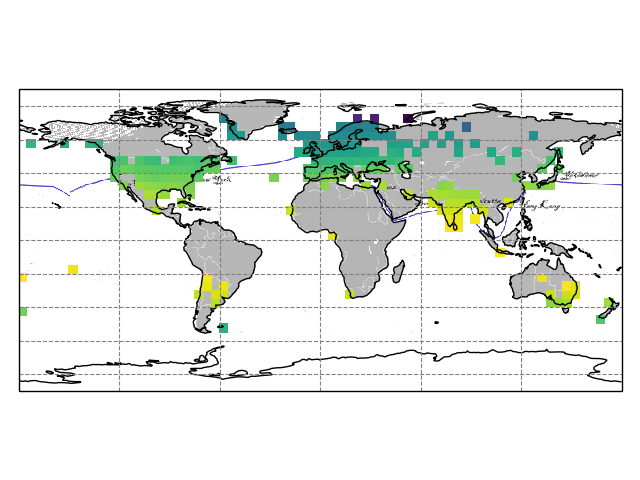

C:\Users\burtg\AppData\Local\Continuum\anaconda3\envs\scipy-cartopy-tutorial\lib\site-packages\iris\coords.py:1000: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
C:\Users\burtg\AppData\Local\Continuum\anaconda3\envs\scipy-cartopy-tutorial\lib\site-packages\iris\coords.py:1000: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))


In [16]:
# EXERCISE 3.1:
plt.figure()

ax = plt.axes(projection=ccrs.PlateCarree())
ax.gridlines(color='gray', linestyle='--')
ax.coastlines()

img = plt.imread(fname)
ax.imshow(img, extent=extent, transform=rob, origin='upper')
ax.set_global()

iplt.pcolormesh(october_cube)

plt.tight_layout()
plt.show()


<details>
    <summary style="margin-top: 1em; margin-left: 1em;"><b>Click to show solution for 3.1</b></summary>
<pre>
plt.figure()

ax = plt.axes(projection=ccrs.PlateCarree())
ax.gridlines(color='gray', linestyle='--')
ax.coastlines()

img = plt.imread(fname)
ax.imshow(img, extent=extent, transform=rob, origin='upper')
ax.set_global()

iplt.pcolormesh(october_cube)

plt.tight_layout()
plt.show()
</pre>
</details>

<IPython.core.display.Javascript object>


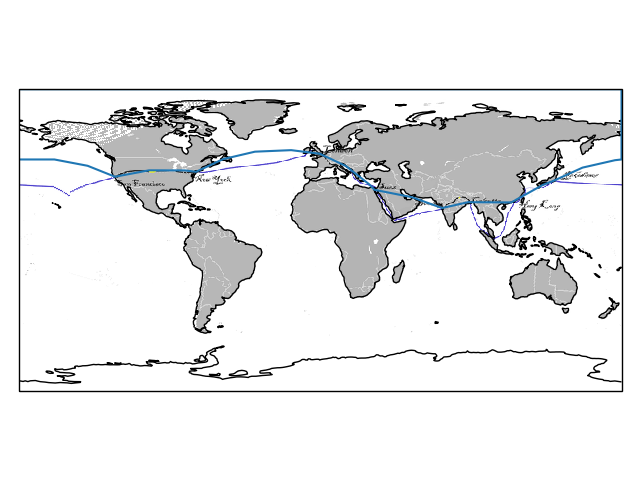

In [17]:
# EXERCISE 3.1 EXTENSION:

# Some approximate locations of each of the cities are provided.
places = {'London': {'lon': -0.1278, 'lat': 51.5074},
          'Suez': {'lon': 32.5498, 'lat': 29.9668},
          'Bombay': {'lon': 72.8777, 'lat': 19.0760},
          'Calcutta': {'lon': 88.3639, 'lat': 22.5726},
          'Hong Kong': {'lon': 114.1095, 'lat': 22.3964},
          'Yokohama': {'lon': 139.6380, 'lat': 35.4437},
          'San Fransisco': {'lon': -122.4194, 'lat': 37.7749},
          'New York City': {'lon': -74.0060, 'lat': 40.7128},
         }

destinations = [
    'London', 'Suez', 'Bombay', 'Calcutta', 'Hong Kong',
    'Yokohama', 'San Fransisco', 'New York City', 'London']

plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

lons, lats = zip(*[
    (places[place]['lon'], places[place]['lat'])
     for place in destinations])

ax.imshow(img, extent=extent, transform=rob, origin='upper')
ax.plot(lons, lats, transform=ccrs.Geodetic())

plt.tight_layout()
plt.show()

<details>
    <summary style="margin-top: 1em; margin-left: 1em;"><b>Click to show solution for 3.1 extension</b></summary>
<pre>
# Some approximate locations of each of the cities are provided.
places = {'London': {'lon': -0.1278, 'lat': 51.5074},
          'Suez': {'lon': 32.5498, 'lat': 29.9668},
          'Bombay': {'lon': 72.8777, 'lat': 19.0760},
          'Calcutta': {'lon': 88.3639, 'lat': 22.5726},
          'Hong Kong': {'lon': 114.1095, 'lat': 22.3964},
          'Yokohama': {'lon': 139.6380, 'lat': 35.4437},
          'San Fransisco': {'lon': -122.4194, 'lat': 37.7749},
          'New York City': {'lon': -74.0060, 'lat': 40.7128},
         }

destinations = [
    'London', 'Suez', 'Bombay', 'Calcutta', 'Hong Kong',
    'Yokohama', 'San Fransisco', 'New York City', 'London']

plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

lons, lats = zip(*[
    (places[place]['lon'], places[place]['lat'])
     for place in destinations])

ax.imshow(img, extent=extent, transform=rob, origin='upper')
ax.plot(lons, lats, transform=ccrs.Geodetic())

plt.tight_layout()
plt.show()
</pre>
</details>